In [0]:
import random
import matplotlib.pyplot as plt

In [0]:
nc, nr = 40,40
states = [[random.randint(-1,2) for x in range(nc)] for y in range(nr)]

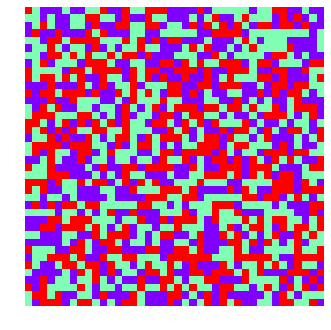

In [0]:
# display as image
plt.axis('off')
plt.grid(False)
plt.imshow(states,cmap='rainbow')

## Schelling's Model of Segregation
* https://en.wikipedia.org/wiki/Thomas_Schelling
* http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/

In [0]:
def swap_all(sts):
  movers = []
  new_states = [[v for v in sts[i]] for i in range(nr)]
  for r in range(nr):
      for c in range(nc):
        celltype = new_states[r][c]
        if celltype==0:
          continue
        nbs = get_neighbours(c,r)
        if nbs.count(celltype)+nbs.count(0)<5:
          movers.append((c,r))
          
  random.shuffle(movers)
  for pc,pr in movers:
    frees = [(c,r) for c in range(nc) for r in range(nr) if new_states[r][c]==0]
    random.shuffle(frees)
    cf,rf = frees[0]
    new_states[rf][cf] = new_states[pr][pc]
    new_states[pr][pc] = 0
  return new_states

In [0]:
# for a given cell coordinate (x,y) return a list of its 8 neighbours
# topology = torus, wraps around borders top-bottom and left-right
def get_neighbours(x,y):
  neighbours = []
  directions = [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]
  for d in directions:
    ox = (x+d[0]) % nc
    oy = (y+d[1]) % nr
    neighbours.append(states[oy][ox])
  return neighbours

In [0]:
for i in range(40):
  states = swap_all(states)

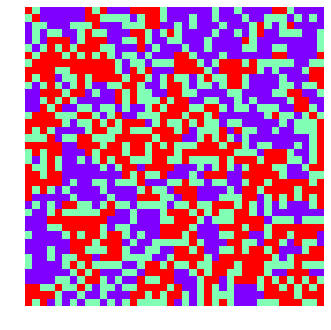

In [0]:
# display as image
plt.axis('off')
plt.grid(False)
plt.imshow(states,cmap='rainbow')